# Bike sharing system

UCL machine learning repository dataset. 

Let's find out how the weather and the season can affect bike rental. 

### FEATURES:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from 
http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Missing.
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
 
This dataset could have info about the duration of travel, departure and arrival position. These features could turn bike sharing system into a virtual sensor network that can be used for sensing mobility in the city.

## 1) Checking the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
FIGSIZE = (12.0, 5.0)
plt.rcParams['figure.figsize'] = (12.0, 5.0)


pd.options.display.max_rows = 25
pd.options.display.max_colwidth = 500

In [2]:
df= pd.read_csv("day.csv")

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Let's rename count for "total" 
df.rename(columns={'cnt':'total'}, inplace=True)

In [4]:
#It shows that people rent more bikes during the summer and spring. 
b = df.groupby(['season'])['total'].sum()

b

season
1     471348
2     918589
3    1061129
4     841613
Name: total, dtype: int64

In [5]:
#Just rechecking that season 3 is summer

df_season2 = df.groupby(['season'])['temp'].mean()

df_season2

season
1    0.297748
2    0.544405
3    0.706309
4    0.422906
Name: temp, dtype: float64

In [6]:
#Let's check that casual + registered = total 

df['compare'] = df['casual'] + df['registered'] - df['total']

df['compare'].isnull().sum()

0

In [7]:
#Only the dteday is an object, there are non NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
total         731 non-null int64
compare       731 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 97.2+ KB


**We can see in the histograms that the counts shift to the right approaching summer time.**

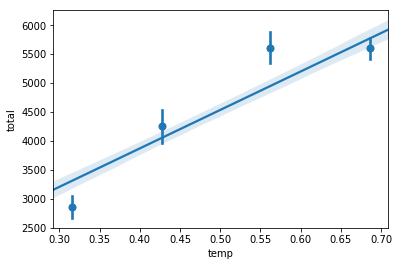

In [8]:
#Using bins to give us a quick read on continuous data

sns.regplot(data=df, x='temp', y='total', x_bins=4)

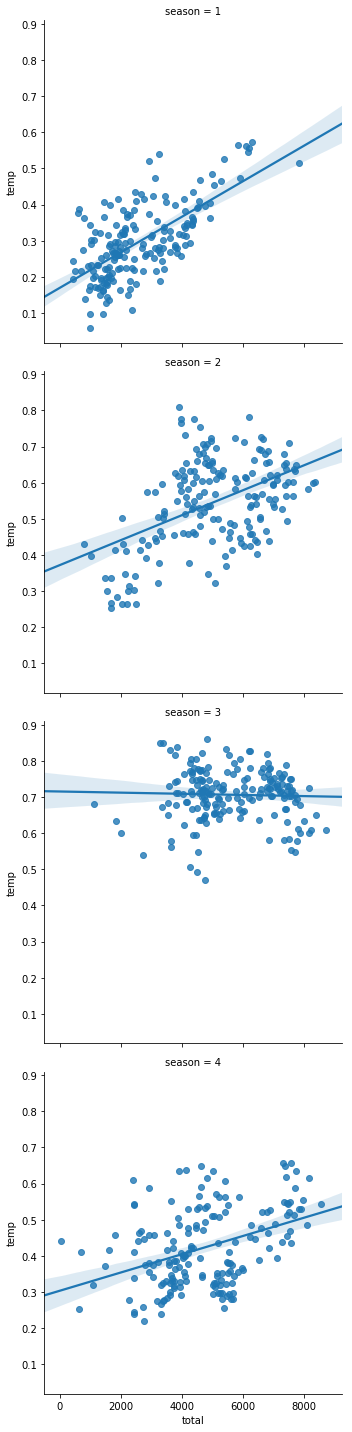

In [9]:
# Create a regression plot with multiple rows to see the trends per season
sns.lmplot(data=df,
           x="total",
           y="temp",
           row="season", palette=None, col_wrap=None, 
            aspect=1, markers='o', sharex=True, 
           sharey=True, hue_order=None, col_order=None, 
           row_order=None, legend=True)

# Show the plot
plt.show()

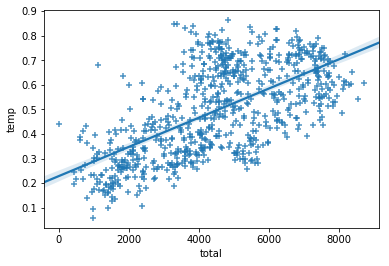

In [10]:
sns.regplot(data=df, x='total'
, y='temp'
, marker='+')

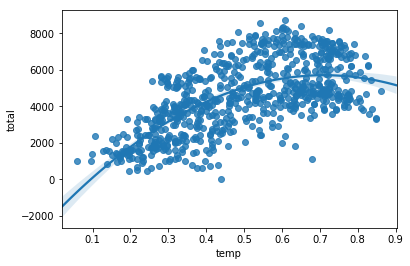

In [11]:
#Trying polinomial of order 2
sns.regplot(data=df, x='temp', y='total', order=2)

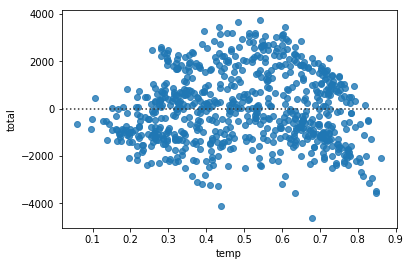

In [12]:
#Residual plot to evaluate if a linear model is reasonable
sns.residplot(data=df, x='temp', y='total')

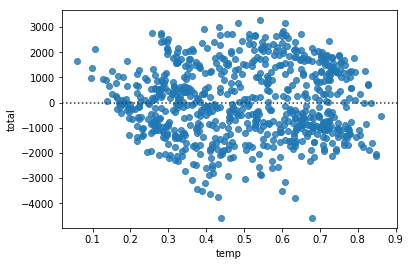

In [13]:
#Residual plot to evaluate if a second order equation is reasonable

sns.residplot(data=df, x='temp', y='total', order =2)

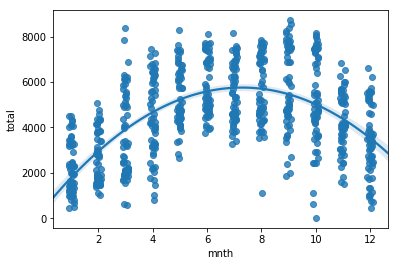

In [14]:
#ploting categorial variables
sns.regplot(data=df, x='mnth', y='total', x_jitter=.1, order=2)

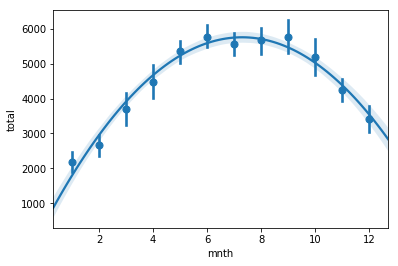

In [15]:
#ploting categorial variables
#Using an estimator to highlight trends, e.g. the mean

sns.regplot(data=df, x='mnth', y='total',
            x_estimator=np.mean, order=2)

### Conclusions

#### - Seasonality plays a role in the data

From the results we can see that people rent more bikes when the weather is warm. This does not apply in the summer, when the slope of the curve is negative and the null hypothesis is true (temperature does not influence renting), giving a p-value of 0.65 (*stat evaluation below*).

New seasonal dataframes must be created.

#### - Second order polinomial 
Polinomial of order two has a more random residual distribution, therefore a second order ecuation is slighlty more appropiate.

 ## 2) Relations between variables
 
Correlation matrixes help us identify relevant relations between variables, besides our target variable. In this way we could determine which variables to drop. 

Our target variable is 'total', the amount of bikes rented, with the types 'casual' and 'registered'. 

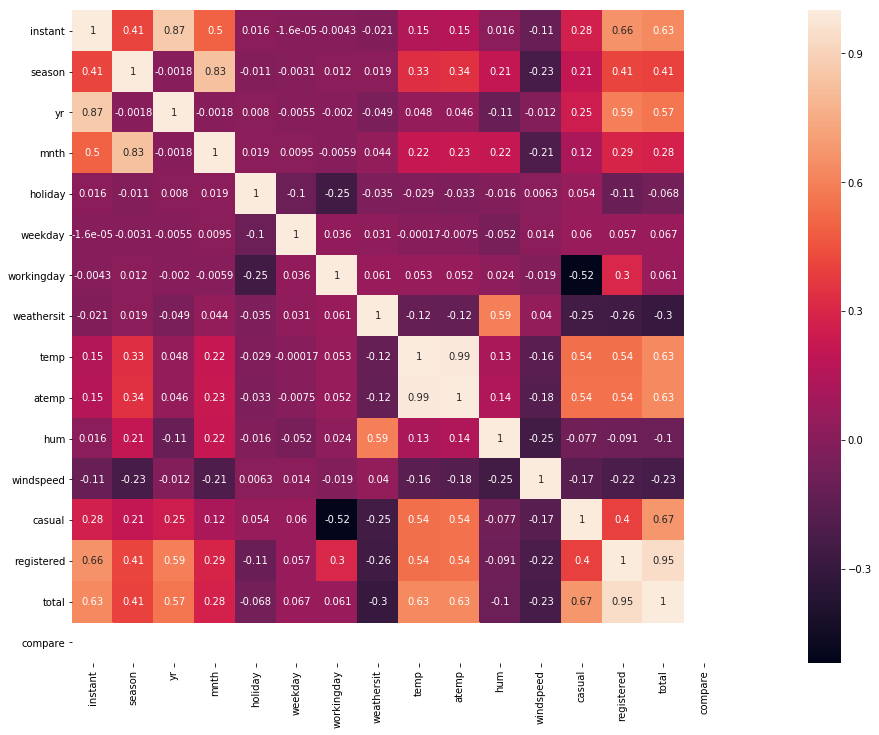

In [16]:
#df correlation matrix 

cor_mat = df[:].corr()
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True);

- The variables more correlated with 'total' are: 'season', 'month', 'weathersit', 'windspeed'. 

- It is notorious the negative correlation between 'workingday' and 'casual' registration (-0.52), and the positive correlation between 'workingday' and 'registered' (0.33). This correlation can be explored later.

Further exploration between 'windspeed' and 'hum' vs. 'weathersit' shows they are negatively correlated.

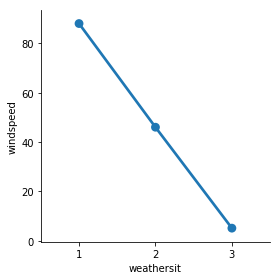

In [17]:
g=sns.factorplot(x='weathersit',y='windspeed', data=df,
                 estimator=sum,
                 ci=None,aspect=1)

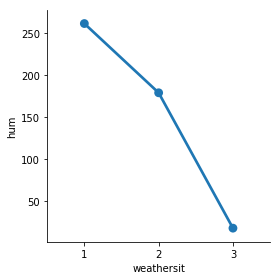

In [18]:
g=sns.factorplot(x='weathersit',y='hum', data=df,
                 estimator=sum,
                 ci=None,aspect=1)

### Year influence

It is shown that all values increase the next year. It is worth noting that winter, the lowest season of 2012, has comparable values to autumn 2011. 

**In the following we will only use the data from 2012**, to avoid mixing the relevance of the total counts.

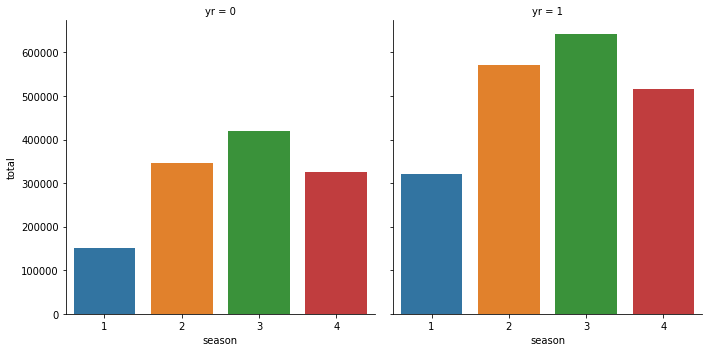

In [19]:
#Total count per year
g=sns.factorplot(x='season',y='total',data=df,
                 col='yr',kind='bar',estimator=sum,
                 ci=None,size=5,aspect=1)

In [20]:
# Dataset from year 2012
df.yr.unique()

df2012 = df[df['yr'] == 1]

df2012.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total,compare
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294,0
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951,0
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236,0
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368,0
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272,0


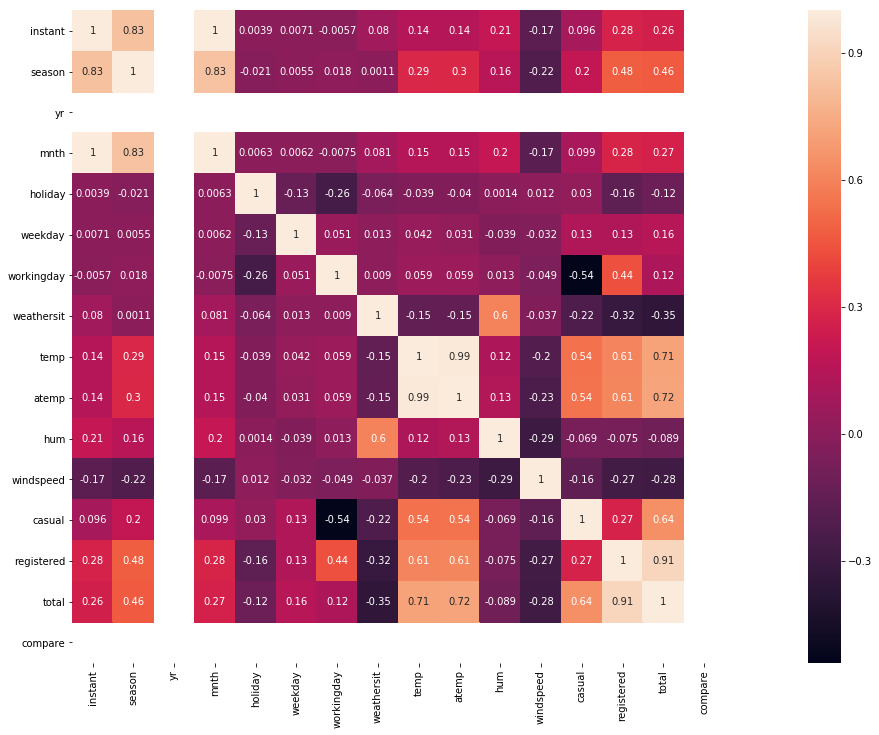

In [21]:
cor_mat = df2012[:].corr()
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True);


#### Report

-  During working days and sunny days there are more bike rented, for all values. 

- There are almost no bikes rented on a bad weather day, for all values. 

- Summer is the only season when a cloudy day influences less bike rental.

- The total bike rental increased for all values during the second year.

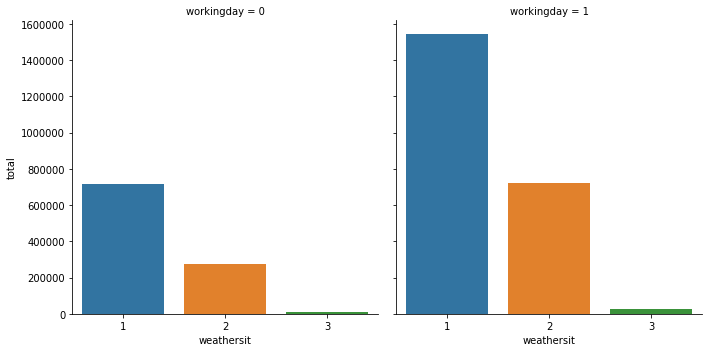

In [22]:
#Weather analysis together with workingday

g=sns.factorplot(x='weathersit',y='total',data=df,
                 col='workingday',kind='bar',estimator=sum,
                 ci=None,size=5,aspect=1)

## 3) Feature engineering 

For the sake of simplicity, we drop variables whose information is already contained in another variable, or are highly correlated. In this way we prevent our model to overfit.

- 'instant' because it is an identity variable.
- 'atemp' because it is highly correlated (0.99) with temp.
- 'weekday' and 'holiday' are already contained in 'workingday'.
- 'casual' and 'registered' are already contained in 'total'.

Remarks: 
- 'season' has general information about the temperature and the date. We can work with seasonal dataframes, dropping 'month', 'dteday'.
- We only have two dates (2011-2012), therefore there is not enough statistical data to make time series.

In [23]:
df2012.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'total', 'compare'], dtype=object)

In [30]:
# drop example: df.drop(['B', 'C'], axis=1)

data = df2012.drop(['instant', 'dteday', 'mnth', 'holiday', 
                'weekday','atemp', 
                    'casual', 'registered', 'compare', 'yr'], axis=1)

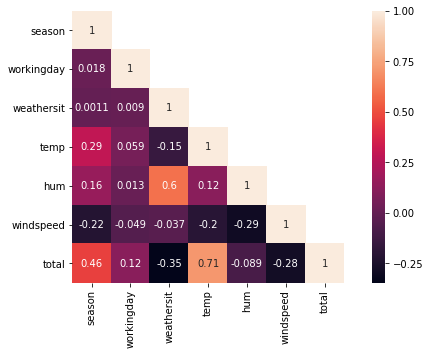

In [25]:
#correlation matrix 
cor_mat = data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.heatmap(data=cor_mat, square=True, mask= mask, annot=True, cbar=True);

### Outliers

"Better data beats better modelling". Boxplots can evidence  outliers. 

In [26]:
data.describe()

,season,workingday,weathersit,temp,hum,windspeed,total
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.494536,0.683060,1.368852,0.504081,0.612166,0.189572,5599.934426
std,1.112185,0.465921,0.516057,0.176112,0.134206,0.078194,1788.667868
min,1.000000,0.000000,1.000000,0.107500,0.254167,0.046650,22.000000
25%,2.000000,0.000000,1.000000,0.347708,0.508125,0.133721,4369.000000
50%,2.500000,1.000000,1.000000,0.514167,0.611875,0.174750,5927.000000
75%,3.000000,1.000000,2.000000,0.653958,0.711146,0.231196,7011.250000
max,4.000000,1.000000,3.000000,0.861667,0.925000,0.441563,8714.000000


In [29]:
#std^2 = Variance 

std= [1.112185, 0.465921, 0.516057, 0.176112, 0.134206, 0.078194, 1788.667868]
mean = [2.4, 0.68, 1.36, 0.5040, 0.6121, 0.18, 5599.9]

#Let's see if poisson applies, when the variance ~ mean

for i in std:
    print(np.multiply(std, std)- mean)


[-1.16304453e+00 -4.62917622e-01 -1.09368517e+00 -4.72984563e-01
 -5.94088750e-01 -1.73885698e-01  3.19373284e+06]
[-1.16304453e+00 -4.62917622e-01 -1.09368517e+00 -4.72984563e-01
 -5.94088750e-01 -1.73885698e-01  3.19373284e+06]
[-1.16304453e+00 -4.62917622e-01 -1.09368517e+00 -4.72984563e-01
 -5.94088750e-01 -1.73885698e-01  3.19373284e+06]
[-1.16304453e+00 -4.62917622e-01 -1.09368517e+00 -4.72984563e-01
 -5.94088750e-01 -1.73885698e-01  3.19373284e+06]
[-1.16304453e+00 -4.62917622e-01 -1.09368517e+00 -4.72984563e-01
 -5.94088750e-01 -1.73885698e-01  3.19373284e+06]
[-1.16304453e+00 -4.62917622e-01 -1.09368517e+00 -4.72984563e-01
 -5.94088750e-01 -1.73885698e-01  3.19373284e+06]
[-1.16304453e+00 -4.62917622e-01 -1.09368517e+00 -4.72984563e-01
 -5.94088750e-01 -1.73885698e-01  3.19373284e+06]


In any case the variance is bigger than the mean. 

In [48]:
#Filtering outliers 
# this filter does not do much

ndata = data[np.abs(data["total"]-data["total"].mean())
             <=(3*data["total"].std())] 

ndata.shape

(365, 7)

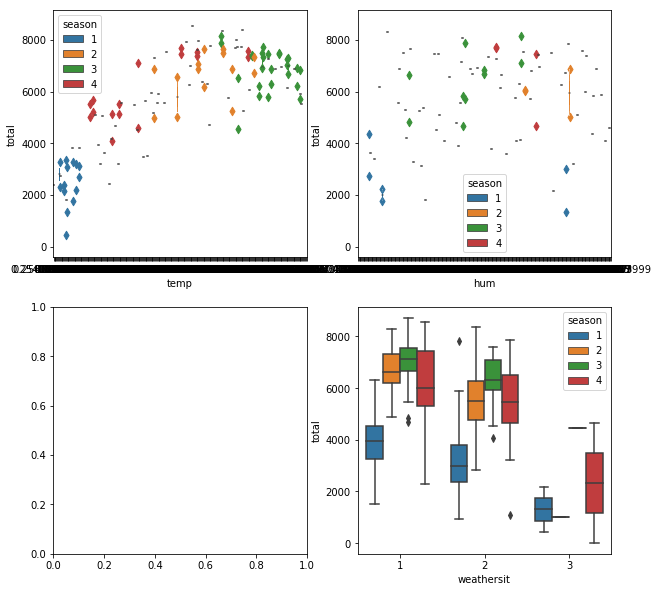

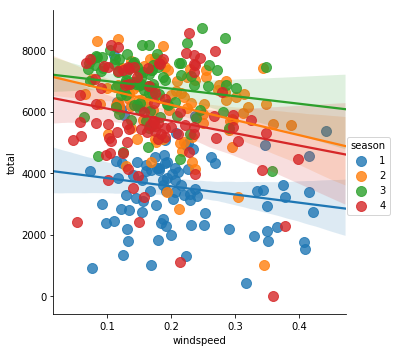

In [52]:
#exploring outliers again

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10, 10)


sns.lvplot(data=data, y="total", x="temp", hue= 'season', orient="v", ax=axes[0][0])
sns.lvplot(data=data, y="total", x="hum", hue= 'season', orient="v", ax=axes[0][1])
sns.boxplot(data=data, y="total", x="weathersit", hue= 'season', orient="v", ax=axes[1][1])

#lmplot do not accept the argument ax
sns.lmplot(data=data, y="total", x="windspeed", fit_reg= True, hue= 'season', aspect=1,
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) 

The graphs show how autumn is the season with more weather irregularities. The variables 'windspeed' and 'hum' have a lot of variance. 

### Hypothesis testing:

A model using'weathersit' is be more realistic, but a model that drops it to give more importance to 'temp' with be simpler and with a better fitting result. 

'temp' is the most correlated variable to the target audience 'total'.

In [33]:
#ndata = ndata.drop(['hum', 'windspeed'], axis=1)

ndata.columns

Index(['season', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
       'total'],
      dtype='object')

In [35]:
#Creating seasonal datasets 
#winter, spring, summer and autumn
season1 = ndata[ndata['season']== 1]
season2 = ndata[ndata['season']== 2]
season3 = ndata[ndata['season']== 3]
season4 = ndata[ndata['season']== 4]

## 4) Seasonality correlations

- Workingday = summer (+ 0.3),  winter (+0.28), spring (+0.13), autumn (-0.08).
- Weathersit= spring (-0.59),  winter(-0.35), summer (-0.38), autumn (-0.24). 
- Temperature = winter (+0.81),  autumn (0.69), spring (0.42)  summer (-0.33). 
- Humidity = spring (-0.34), summer (-0.31), autumn (-0.11), winter (-0.08).
- Windspeed = spring (-0.29), winter (- 0.18), summer (-0.17), autumn (-0.11).

### Report
- Temperature is the most important feature, being very highly correlated during winter (+0.81) and only negatively correlated during summer (-0.33).
- Weathersit, humidity and windspeed are negatively correlated for all seasons.
- Weathersit is the second most important feature, being more relevant during spring (-0.59).
- Workingday is more relevant during summer and winter, but almost non correlated during autumn.
- Humidity and windspeed are more relevant during spring.

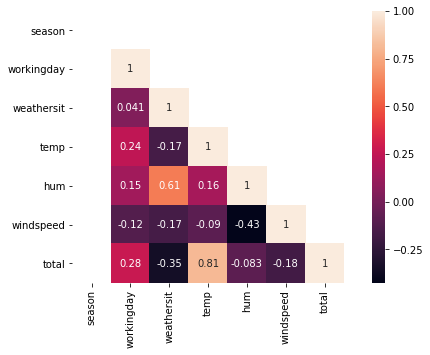

In [37]:
#Winter correlation matrix 
cor_mat = season1[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.heatmap(data=cor_mat, square=True, mask= mask, annot=True, cbar=True);

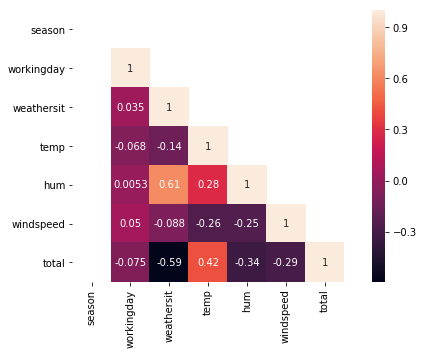

In [38]:
#spring 
cor_mat = season2[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.heatmap(data=cor_mat, square=True, mask= mask, annot=True, cbar=True);

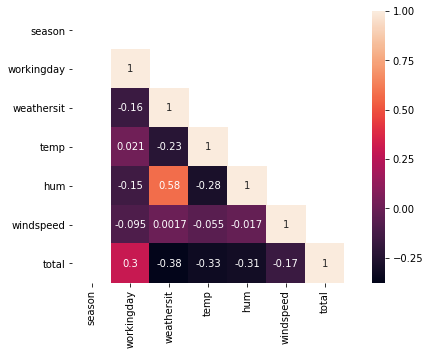

In [39]:
#summer 

cor_mat = season3[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.heatmap(data=cor_mat, square=True, mask= mask, annot=True, cbar=True);

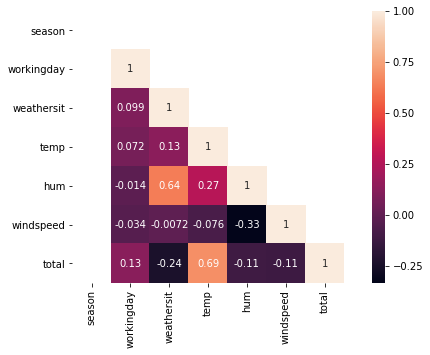

In [40]:
#autumn

#spring correlation matrix 
cor_mat = season4[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.heatmap(data=cor_mat, square=True, mask= mask, annot=True, cbar=True);

## 4) Modelling 

Train/test split and cross-validation attempt to directly estimate how well the model will generalize to out-of-sample data. I would like to have a function that stratifies the sampling, not that randomly selects it, but this function does not exist in python but R. Ideally we could export the dataset and process it in R.

In [42]:
#x variables

xwinter = season1.drop(['season', 'total'], axis=1)
xspring = season2.drop(['season', 'total'], axis=1)
xsummer = season3.drop(['season', 'total'], axis=1)
xautumn = season4.drop(['season', 'total'], axis=1)

In [43]:
#y variables

ywinter = season1.total 
yspring = season2.total
ysummer = season3.total
yautumn = season4.total

In [57]:
#import
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

 ### Train/test split
 
 This is a more reliable approach than using p-values or R-squared for feature selection.

#### Evaluation metrics

We are going to use the RMSE to evaluate the performance of our models, which is interpretable in the y units.

Temperature is the most important feature, being very highly correlated during winter (+0.81) and only negatively correlated during summer (-0.33).
Weathersit, humidity and windspeed are negatively correlated for all seasons.
Weathersit is the second most important feature, being more relevant during spring (-0.59).
Workingday is more relevant during summer and winter, but almost non correlated during autumn.
Humidity and windspeed are more relevant during spring.

In [68]:
# create a list of features
features = ['workingday', 'weathersit', 'temp', 'hum', 'windspeed']

In [69]:
X= xwinter[features]
y = ywinter

In [70]:
from sklearn.model_selection import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(features):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Something is wrong

In [71]:
# compare different sets of features
print(train_test_rmse(['workingday', 'weathersit', 'temp', 'windspeed']))
print(train_test_rmse(['workingday', 'weathersit', 'temp']))
print(train_test_rmse(['temp']))

886.832155096882
886.832155096882
886.832155096882


In [77]:
X= xsummer[features]
y = ysummer

In [78]:
# compare different sets of features
print(train_test_rmse(['workingday', 'weathersit', 'temp', 'windspeed']))
print(train_test_rmse(['workingday', 'weathersit', 'temp']))
print(train_test_rmse(['temp']))

812.9835921875068
812.9835921875068
812.9835921875068


In [ ]:
print('intercept %.4f' % linreg.intercept_)
print(linreg.coef_)
#model 

#linreg.predict(10)

In [81]:
#Another method
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

lin_mse = mean_squared_error(y_pred, y_test)
y_pred = linreg.predict(X_test)
lin_rmse = np.sqrt(lin_mse)

NameError: name 'y_pred' is not defined

In [ ]:
print(' R^2: %.4f' % linreg.score(X_test, y_test))
print('RMSE: %.4f' % lin_rmse)

### RMSE vs. null RMSE

Null RMSE is the RMSE that could be achieved by always predicting the mean response value. It is a benchmark against which you may want to measure your regression model.

In [ ]:
 # create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())

# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

### Another method: comparing seasons using dummy variables

In [ ]:
#ANOTHER METHOD 
    # create dummy variables
season_dummies = pd.get_dummies(df.season, prefix='season')

# print 5 random rows
#season_dummies.sample(n=5, random_state=1)

# concatenate the original DataFrame and the dummy DataFrame 
#(axis=0 means rows, axis=1 means columns)

bikes = pd.concat([df, season_dummies], axis=1)

# print 5 random rows
#bikes.sample(n=5, random_state=1)

# include dummy variables for season in the model
feature_cols = ['workingday', 'weathersit', 'temp', 'hum', 'windspeed','season_2', 'season_3', 'season_4']

X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)
print(feature_cols, linreg.coef_)

In [ ]:
# compare original season variable with dummy variables
print(train_test_rmse(['workingday', 'weathersit']))
print(train_test_rmse(['workingday', 'weathersit', 'temp', 'hum', 'windspeed','season_2', 'season_3', 'season_4']))

#### Meaning of the coefficients
During winter, if we holding all other features fixed, one unit increase in ... 

- ... workingday is associated with a rental increase of 295 bikes.
- ... weathersit, decrease of -573 bikes.
- ... temp, increase of 9692 bikes.

These are not statements of causation.

#### Using the model for prediction

How many bike rentals would we predict if the temperature was 10 degrees Celsius?

In [ ]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*10

In [ ]:
#HOUR, to do later

# hour as a numeric feature
bikes['hour'] = bikes.index.hour
# hour as a categorical feature
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes = pd.concat([bikes, hour_dummies], axis=1)
# daytime as a categorical feature
bikes['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)


print(train_test_rmse(['hour']))
print(train_test_rmse(bikes.columns[bikes.columns.str.startswith('hour_')]))
print(train_test_rmse(['daytime']))

In [ ]:
#ALL SORTS OF MODELS FOR LATER

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, Normalizer, minmax_scale, QuantileTransformer, RobustScaler, PolynomialFeatures
#from sklearn.model_selection import KFold, cross_val_score

#from xgboost import XGBRegressor

In [ ]:
#ROC AUC score

import numpy as np
from sklearn.metrics import roc_auc_score
#roc_auc_score(true_target, prob_target)

#ywinfit = linreg.predict(xwinter)